# Analysis dataset 18 
Dataset 11 with manual keypoints

In [ ]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Version 5 models

In [65]:
# Get list of all CSV files in the folder
csv_files = glob.glob('output/check quality/DHRdiff_18_0100_0.001_0_1_1_20241120-230705_BCS_1way_beam1_point_reverse_test/*.csv')

# Read each CSV file into a DataFrame and store in a list
df_5models = pd.read_csv(csv_files[0], header=0, index_col=0)

# Display the combined DataFrame
df_5models.head()

,mse_before,mse12,tre_before,tre12,mse12_image_before,mse12_image,ssim12_image_before,ssim12_image,num_points,votes
index,,,,,,,,,,
0,590.99133,126.508484,32.300415,14.119698,0.076292,0.018436,0.317088,0.435882,12.0,"[0, 0, 3, 3, 3, 0, 6, 6, 6, 6, 6, 0, 6, 6, 6, ..."
1,702.97820,162.002940,36.293774,15.705562,0.140819,0.079708,0.443707,0.494595,6.0,"[0, 6, 6, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2]"
2,2938.06400,338.139950,76.484300,22.427935,0.086547,0.068943,0.310896,0.273889,11.0,"[5, 5, 5, 5, 5, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, ..."
3,1187.16560,161.852330,46.444990,16.668356,0.093404,0.056011,0.263288,0.234012,12.0,"[5, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 6, 6, ..."
4,1318.01030,255.173320,50.401264,21.365023,0.081432,0.109806,0.388608,0.243417,12.0,"[5, 5, 5, 5, 5, 1, 5, 1, 5, 1, 5, 5, 5, 5, 5, ..."


# Version 10 models

In [66]:
# Get list of all CSV files in the folder
csv_files = glob.glob('output/added new models/DHRdiff_18_0100_0.001_0_1_1_20241122-004214_BCS_1way_beam1_point_reverse_test/*.csv')
# print(csv_files)

# Read each CSV file into a DataFrame and store in a list
df_10models = pd.read_csv(csv_files[0], header=0, index_col=0)

# Display the combined DataFrame
df_10models.head()

,mse_before,mse12,tre_before,tre12,mse12_image_before,mse12_image,ssim12_image_before,ssim12_image,num_points,votes
index,,,,,,,,,,
0,590.99133,21.775133,32.300415,5.735022,0.076292,0.083996,0.317088,0.355041,12.0,"[0, 17, 0, 17, 17, 17, 17, 17, 6, 17, 6, 6, 18..."
1,702.97820,85.416850,36.293774,9.866286,0.140819,0.097429,0.443707,0.449894,6.0,"[5, 5, 11, 1, 1, 1, 1, 1, 2, 2, 2, 8, 2, 2, 19..."
2,2938.06400,278.487430,76.484300,20.293770,0.086547,0.080070,0.310896,0.271542,11.0,"[10, 10, 10, 10, 10, 11, 11, 11, 3, 3, 3, 3, 3..."
3,1187.16560,41.995083,46.444990,6.839566,0.093404,0.044121,0.263288,0.164864,12.0,"[6, 6, 6, 6, 9, 9, 10, 9, 9, 9, 5, 13, 13, 17,..."
4,1318.01030,86.396450,50.401264,11.705308,0.081432,0.082289,0.388608,0.327317,12.0,"[15, 10, 10, 10, 10, 1, 10, 1, 10, 1, 10, 10, ..."


In [67]:
step_list = []

# take length of each data in the column votes
print("10/5 models : ")
for i in range(0, len(df_5models['votes'])-2):
    # print(df_5models['votes'][i])
    # print length of each list data in the column votes
    # convert into list first
    df_10models['votes'][i] = eval(df_10models['votes'][i])
    df_5models['votes'][i] = eval(df_5models['votes'][i])
    # print(f"{len(df_10models['votes'][i])-len(df_5models['votes'][i])}")
    step_list.append(len(df_10models['votes'][i])-len(df_5models['votes'][i]))

10/5 models : 


/tmp/ipykernel_41962/3864773881.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_10models['votes'][i] = eval(df_10models['votes'][i])
/tmp/ipykernel_41962/3864773881.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10models['votes'][i] = eval(df_10models['votes'][i])
/tmp/ipykernel_41962/3864773881.py:9: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  df_10models['votes'][i] = eval(df_10models['votes'][i])
/tmp/ipykern

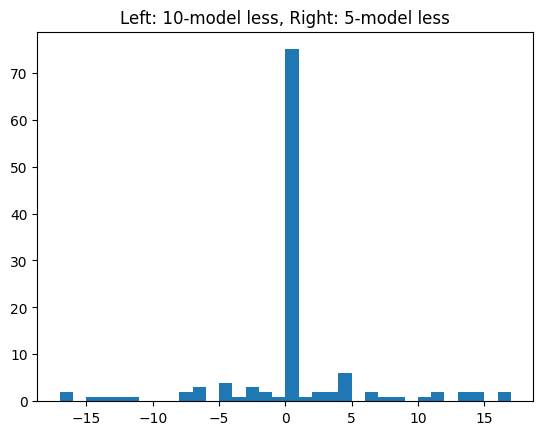

In [74]:
# make a histogram of the step_list

plt.hist(step_list, bins=np.arange(min(step_list), max(step_list)+1, 1))
plt.title("Left: 10-model less, Right: 5-model less")
plt.show()

In [76]:
# print amount of negative and positive values
print(f"10-model less steps: {len([i for i in step_list if i < 0])}")
print(f"5-model less steps: {len([i for i in step_list if i > 0])}")
print(f"Equal steps: {len([i for i in step_list if i == 0])}")


10-model less steps: 22
5-model less steps: 24
Equal steps: 75


In [ ]:
# show the most common 3 steps in each model
for i in range(0, len(df_5models['votes'])-2):
    print(f"10-models: {max(set(df_10models['votes'][i]), key = df_10models['votes'][i].count)}")
    print(f"5-models: {max(set(df_5models['votes'][i]), key = df_5models['votes'][i].count)}")
    

10-models: 1
5-models: 2
10-models: 1
5-models: 2
10-models: 3
5-models: 3
10-models: 17
5-models: 7
10-models: 10
5-models: 5
10-models: 19
5-models: 0
10-models: 17
5-models: 1
10-models: 19
5-models: 5
10-models: 3
5-models: 6
10-models: 19
5-models: 8
10-models: 19
5-models: 6
10-models: 10
5-models: 8
10-models: 1
5-models: 1
10-models: 11
5-models: 6
10-models: 3
5-models: 1
10-models: 1
5-models: 1
10-models: 18
5-models: 6
10-models: 4
5-models: 4
10-models: 0
5-models: 6
10-models: 18
5-models: 2
10-models: 19
5-models: 9
10-models: 9
5-models: 2
10-models: 13
5-models: 2
10-models: 4
5-models: 4
10-models: 13
5-models: 1
10-models: 13
5-models: 1
10-models: 10
5-models: 5
10-models: 18
5-models: 2
10-models: 19
5-models: 6
10-models: 11
5-models: 2
10-models: 2
5-models: 9
10-models: 19
5-models: 0
10-models: 9
5-models: 1
10-models: 11
5-models: 6
10-models: 19
5-models: 0
10-models: 11
5-models: 6
10-models: 9
5-models: 7
10-models: 2
5-models: 4
10-models: 17
5-models: 1
1

/tmp/ipykernel_41962/3743357347.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"10-models: {max(set(df_10models['votes'][i]), key = df_10models['votes'][i].count)}")
/tmp/ipykernel_41962/3743357347.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"5-models: {max(set(df_5models['votes'][i]), key = df_5models['votes'][i].count)}")
